# Unsupervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of unsupervised learning model evaluation.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets

data = datasets.load_wine()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.Series(data["target"])

## 1. Train a KMeans clustering model on the data set using 8 clusters and compute the silhouette score for the model.

In [3]:
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score

In [4]:
kmeans = KMeans(n_clusters=8, random_state=0).fit(X)

In [5]:
#documentation: https://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient
score = silhouette_score(X, kmeans.labels_, metric='euclidean')
print('The silhouette score for the model is :', score)

The silhouette score for the model is : 0.5486213604076143


## 2. Train a KMeans clustering model on the data set using 5 clusters and compute the silhouette score for the model.

In [6]:
kmeans1 = KMeans(n_clusters=5, random_state=0).fit(X)

In [7]:
score1 = silhouette_score(X, kmeans1.labels_, metric='euclidean')
print('The silhouette score for the model is :', score1)

The silhouette score for the model is : 0.5489993239795691


## 3. Train a KMeans clustering model on the data set using 3 clusters and compute the silhouette score for the model.

In [8]:
kmeans2 = KMeans(n_clusters=3, random_state=0).fit(X)

In [9]:
score2 = silhouette_score(X, kmeans2.labels_, metric='euclidean')
print('The silhouette score for the model is :', score2)

The silhouette score for the model is : 0.5711381937868844


## 4. Use elbow curve visualizations to see if you can determine the best number of clusters to use.

The Yellowbrick library has 3 metrics that you can plot using the `metric` parameter:

- **distortion**: mean sum of squared distances to centers
- **silhouette**: mean ratio of intra-cluster and nearest-cluster distance
- **calinski_harabaz**: ratio of within to between cluster dispersion

By default, the scoring parameter metric is set to **distortion**, which computes the sum of squared distances from each point to its assigned center. However, two other metrics can also be used with the KElbowVisualizer – **silhouette** and **calinski_harabasz**. The silhouette score calculates the mean Silhouette Coefficient of all samples, while the calinski_harabasz score computes the ratio of dispersion between and within clusters.

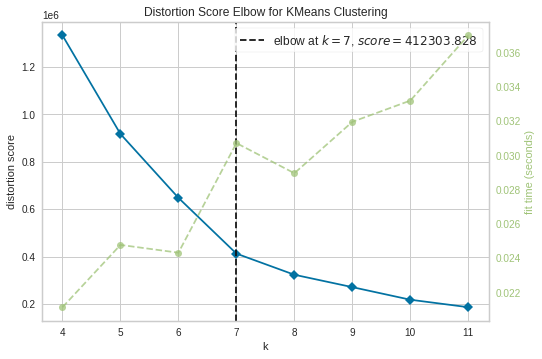

In [10]:
#Documentation : https://www.scikit-yb.org/en/latest/api/cluster/elbow.html

##--------------- DISTORTION -------------------

from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,12))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show();

/home/ubuntu/.local/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/ubuntu/.local/lib/python3.8/site-packages/yellowbrick/cluster/elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


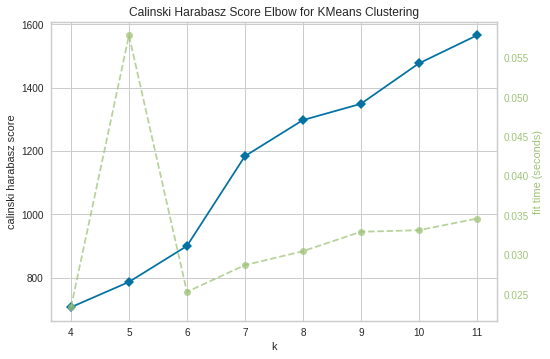

In [11]:
##--------------- Calinski_harabasz -------------------

# Instantiate the clustering model and visualizer
model2 = KMeans()
visualizer = KElbowVisualizer(model2, k=(4,12), metric='calinski_harabasz')

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show();


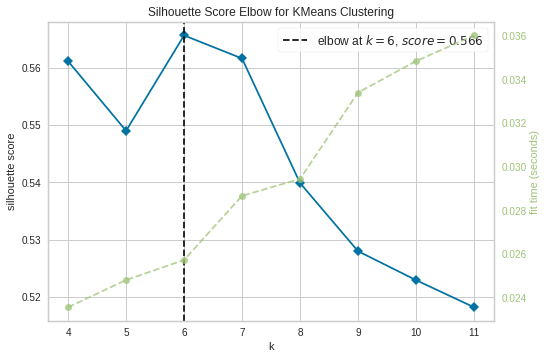

In [12]:
##--------------- SILHOUETTE -------------------

# Instantiate the clustering model and visualizer
model3 = KMeans()
visualizer = KElbowVisualizer(model3, k=(4,12), metric='silhouette')

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show();

## 5. Try performing the same elbow tests with an AgglomerativeClustering model and compare the results you get to the KMeans results.

In [13]:
#Documentation : https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html
from sklearn.cluster import AgglomerativeClustering

In [14]:
aglo_clustering = AgglomerativeClustering().fit(X)
model4 = AgglomerativeClustering()

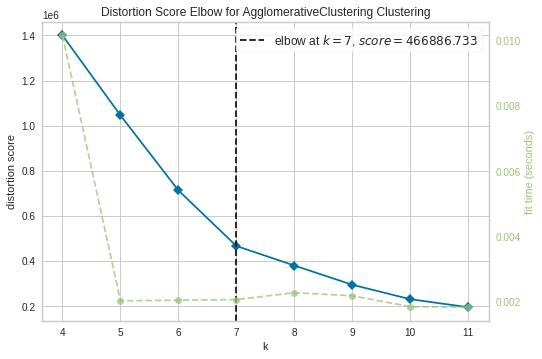

In [15]:
##--------------- DISTORTION -------------------

visualizer = KElbowVisualizer(model4, k=(4,12))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show();

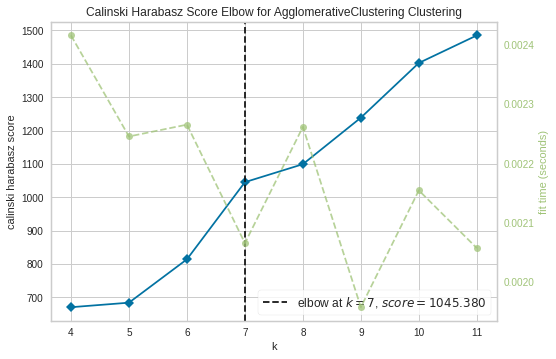

In [16]:
##--------------- Calinski_harabasz -------------------

visualizer = KElbowVisualizer(model4, k=(4,12), metric='calinski_harabasz')

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show();

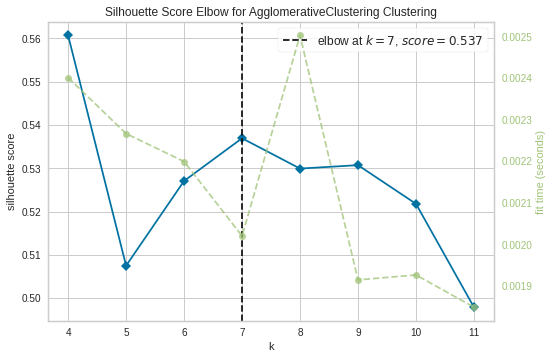

In [18]:
##--------------- SILHOUETTE -------------------

visualizer = KElbowVisualizer(model4, k=(4,12), metric='silhouette')

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show();

## 6. Create and plot a scatter matrix showing how the clusters are grouped across all the different combinations of variables in the data.

Use the model and number of clusters that returned the best result above.

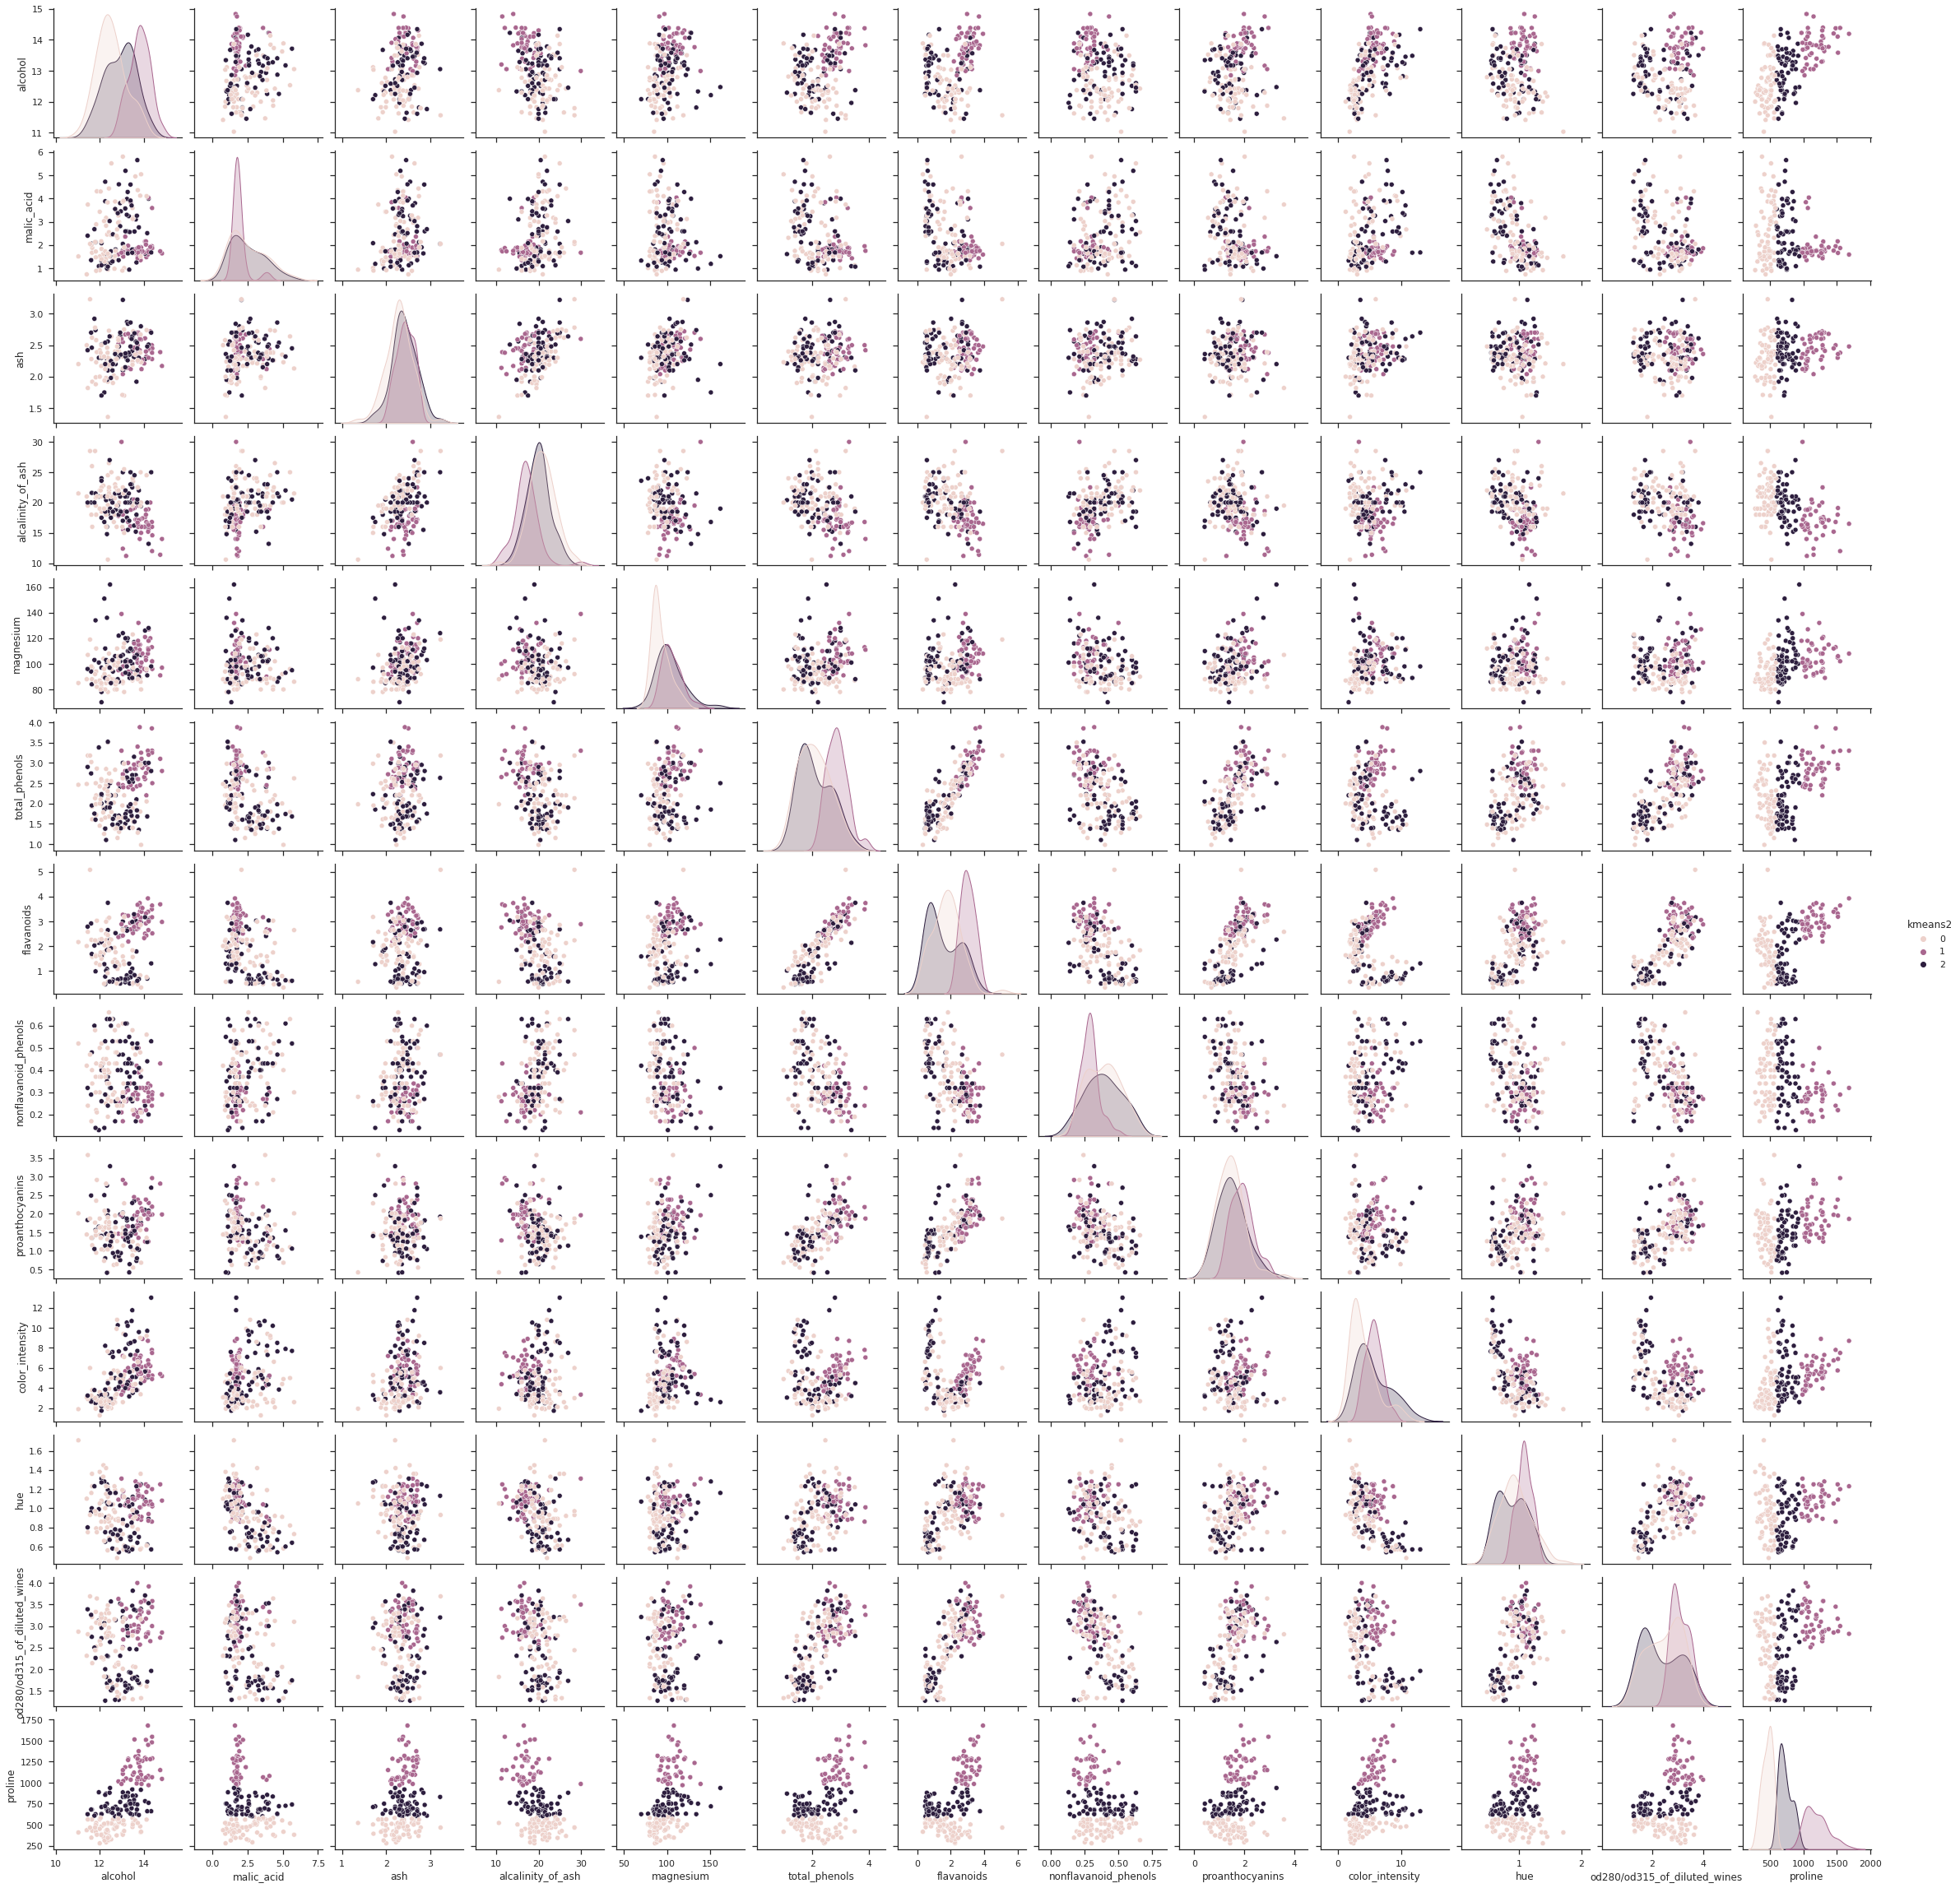

In [21]:
import seaborn as sns
sns.set_theme(style="ticks")

#Ive used one of the models created above kmeans2
df = pd.DataFrame(X, columns=data['feature_names'])
kmeans2.fit(df)
df["kmeans2"]=kmeans2.labels_
sns.pairplot(df, hue="kmeans2");

## 7. Apply a PCA transform and plot the first two principle components with the plot point colors determined by cluster.

In [22]:
from sklearn.decomposition import PCA

In [23]:
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

/home/ubuntu/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

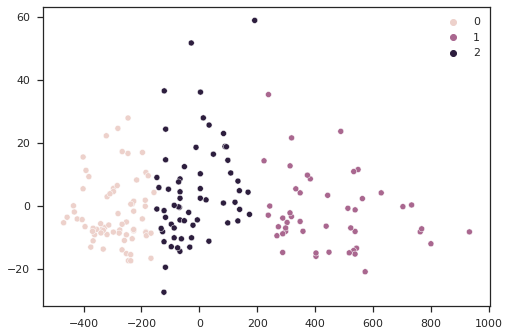

In [34]:
Y = pca.transform(X)

#Plot only the first two principle components:
sns.scatterplot(Y[:,0],Y[:,1], hue= kmeans2.labels_)

## 8. Generate a series of t-SNE plots showing the clusters at a variety of perplexities.

In [38]:
from sklearn.manifold import TSNE

In [39]:
X_embedded = TSNE(n_components=2).fit_transform(X)

/home/ubuntu/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

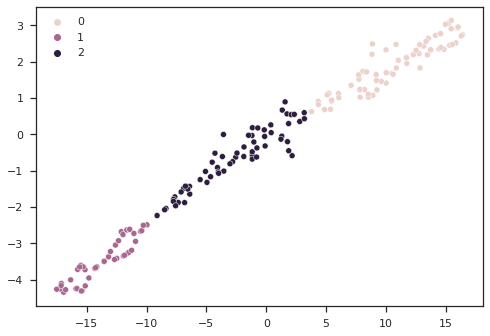

In [40]:
#Plot only the first two principle components:
sns.scatterplot(X_embedded[:,0],X_embedded[:,1], hue= kmeans2.labels_)